# **Statistical Machine Learning: Exercise 2**

Mei Ling Fang 2659271, Zhanglei Sun 2343406

In [ ]:
!git clone https://github.com/julieeecious/sml-dataset.git

Cloning into 'sml-dataset'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [ ]:
ls sml-dataset/dataSets/

densEst1.txt  densEst2.txt  gmm.txt  nonParamTest.txt  nonParamTrain.txt


In [ ]:
from math import *
import numpy as np
import scipy.stats
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KernelDensity, KDTree

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Task 2


In [ ]:
# 2b) Prior Probability

c1 = np.loadtxt('sml-dataset/dataSets/densEst1.txt')
c2 = np.loadtxt('sml-dataset/dataSets/densEst2.txt')

prior_C1 = c1.shape[0] / (c1.shape[0] + c2.shape[0])
prior_C2 = c2.shape[0] / (c1.shape[0] + c2.shape[0])
print(f'p(C1) = {prior_C1}')
print(f'p(C2) = {prior_C2}')

p(C1) = 0.239
p(C2) = 0.761


In [ ]:
# 2(c)

def mean(dataset):
  sum = 0
  for i in range(dataset.shape[0]):
    sum += dataset[i]
  return sum / dataset.shape[0] 


In [ ]:
def variance(dataset):
  tmp = 0
  mu = mean(dataset)
  for i in range(dataset.shape[0]):
    tmp += (dataset[i] - mu) ** 2
  return tmp / dataset.shape[0]

In [ ]:
def unbiased_variance(dataset):
  tmp = 0
  mu = mean(dataset)
  for i in range(dataset.shape[0]):
    tmp += (dataset[i] - mu) ** 2
  return tmp / (dataset.shape[0] - 1)

In [ ]:
def covariance(data):
    tmp = 0
    mu = mean(data)
    for sample in data:
      tmp += (sample - mu).reshape(-1,1) * (sample - mu)
    return tmp / data.shape[0]

In [ ]:
def unbiased_cov(data):
    tmp = 0
    mu = mean(data)
    for sample in data:
      tmp += (sample - mu).reshape(-1,1) * (sample - mu)
    return tmp / (data.shape[0] - 1)


In [ ]:
t = PrettyTable()
t.field_names = ["Class", "Mean \u03BC", "Variance \u03C3\u00b2", "Unbiased Var \u03C3\u00b2", "Covariance \u03C3", "Unbiased Covar \u03C3"]

t.add_row(["Class 1", mean(c1), variance(c1), unbiased_variance(c1), covariance(c1), unbiased_cov(c1)])
t.add_row(["", "", "", "", "", ""])
t.add_row(["Class 2", mean(c2), variance(c2), unbiased_variance(c2), covariance(c2), unbiased_cov(c2)])
  
print(t)

+---------+---------------------------+-------------------------+-------------------------+---------------------------+---------------------------+
|  Class  |           Mean μ          |       Variance σ²       |     Unbiased Var σ²     |        Covariance σ       |      Unbiased Covar σ     |
+---------+---------------------------+-------------------------+-------------------------+---------------------------+---------------------------+
| Class 1 | [-0.70681374 -0.81343083] | [9.01952586 3.59633965] | [9.05742302 3.61145033] |  [[9.01952586 2.67287085] |  [[9.05742302 2.6841014 ] |
|         |                           |                         |                         |  [2.67287085 3.59633965]] |  [2.6841014  3.61145033]] |
|         |                           |                         |                         |                           |                           |
| Class 2 |  [3.98534252 3.98438364]  | [4.1753815  2.75296323] | [4.18087542 2.75658555] |  [[4.1753815  0.0275

In [ ]:
c1.reshape(-1,1).shape

(478, 1)

In [ ]:
c1.shape

(239, 2)

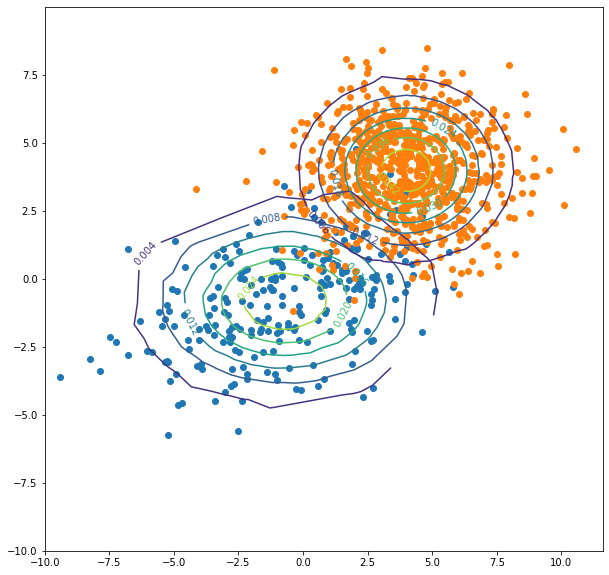

In [ ]:
# 2d

mean1 = np.mean(c1,axis=0)
mean2 =np.mean(c2,axis=0)
var1 = np.var(c1,axis=0)
var2 =  np.var(c2,axis=0)

prob_dense1 = scipy.stats.multivariate_normal.pdf(c1,mean=mean1,cov=np.diag(var1))
prob_dense2 = scipy.stats.multivariate_normal.pdf(c2,mean=mean2,cov=np.diag(var2))

x,y = np.mgrid[-10:10:0.01,-10:10:0.01]

z1 = scipy.interpolate.griddata(c1,prob_dense1,(x,y))
z2 = scipy.interpolate.griddata(c2,prob_dense2,(x,y))

plt.figure(1,figsize=(10,10))

contour1 = plt.contour(x,y,z1)
contour2 = plt.contour(x,y,z2)

plt.clabel(contour1)
plt.clabel(contour2)

plt.scatter(c1[:,0],c1[:,1],cmap='rainbow')
plt.scatter(c2[:,0],c2[:,1],cmap='rainbow')

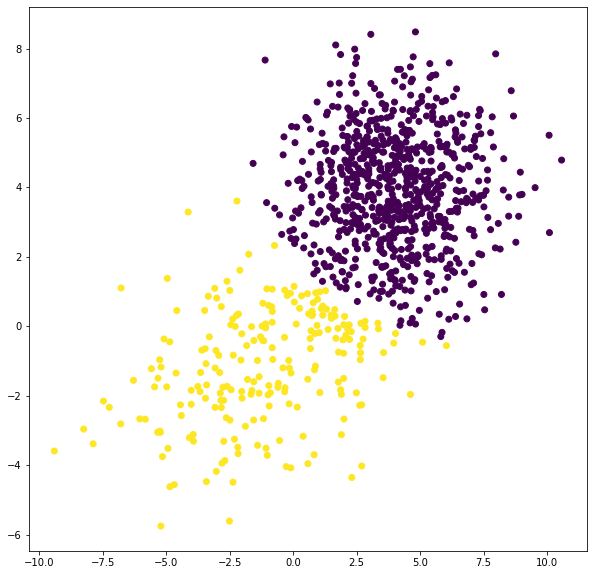

In [ ]:
# 2e

# mix all point 
point = np.concatenate((c1,c2))  
post=np.zeros_like(point)

# posterior of c1 of each point 
post[:,0] = prior_C1*scipy.stats.multivariate_normal.pdf(point,mean=mean1,cov=np.diag(var1))  
# posterior of c2 of each point 
post[:,1] = prior_C2*scipy.stats.multivariate_normal.pdf(point,mean=mean2,cov=np.diag(var2))  

decision_boundary = post[:,0] > post[:,1]

plt.figure(figsize=(10,10))
plt.scatter(point[:,0],point[:,1],c=decision_boundary)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


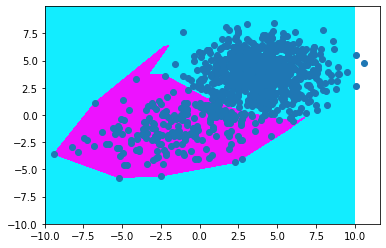

In [ ]:
# interpolation for representing decision boundaries more specific
x,y = np.mgrid[-10:10:0.01,-10:10:0.01]

post1 = scipy.interpolate.griddata(point,post[:,0],(x,y))
post2 = scipy.interpolate.griddata(point,post[:,1],(x,y))

z =post1 > post2

post1

plt.contourf(x,y,z,cmap='cool')
plt.scatter(point[:,0],point[:,1])

## Task 3

In [ ]:
# Aufgabe 3
train = np.loadtxt('sml-dataset/dataSets/nonParamTrain.txt')
test = np.loadtxt('sml-dataset/dataSets/nonParamTest.txt')

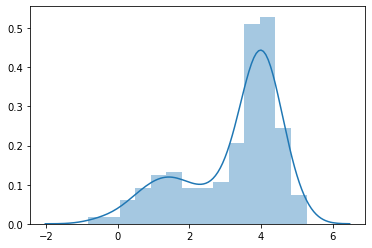

In [ ]:
# Raw Data
sns.distplot(train)

In [ ]:
# Set figure size
# sns.set(rc={'figure.figsize':(11,8)})

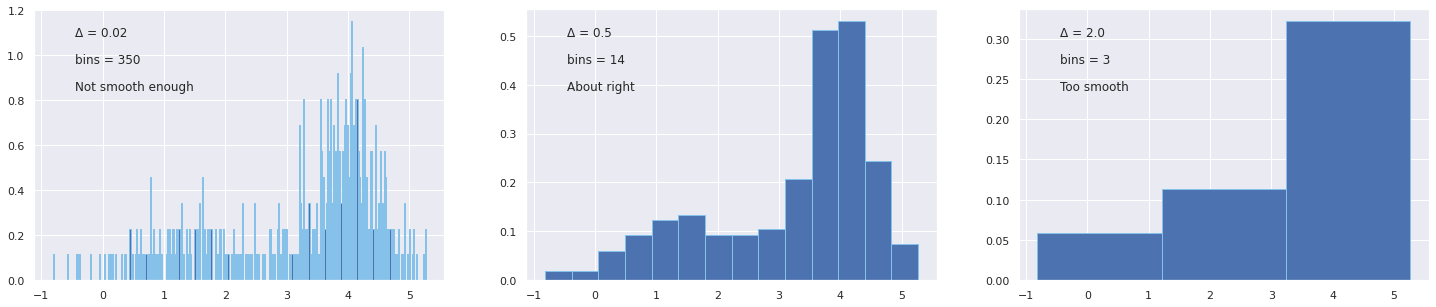

In [ ]:
# 3a Historgram
size = [0.02, 0.5, 2.0]
binc = []
comm = ['Not smooth enough', 'About right', 'Too smooth']

max_train, min_train = np.amax(train), np.amin(train)

fig = plt.figure(figsize=(25,5))

for i in range(3):
  binc.append(int(ceil(max_train - min_train) / size[i]))
  ax = fig.add_subplot(1, 3, i+1)
  ax.hist(train, bins=binc[i], density=True, edgecolor='#85C1E9')
  ax.text(.1,0.9,f'\u0394 = {size[i]}',transform=ax.transAxes)
  ax.text(.1,0.8,f'bins = {binc[i]}',transform=ax.transAxes)
  ax.text(.1,0.7,f'{comm[i]}',transform=ax.transAxes)

plt.show()

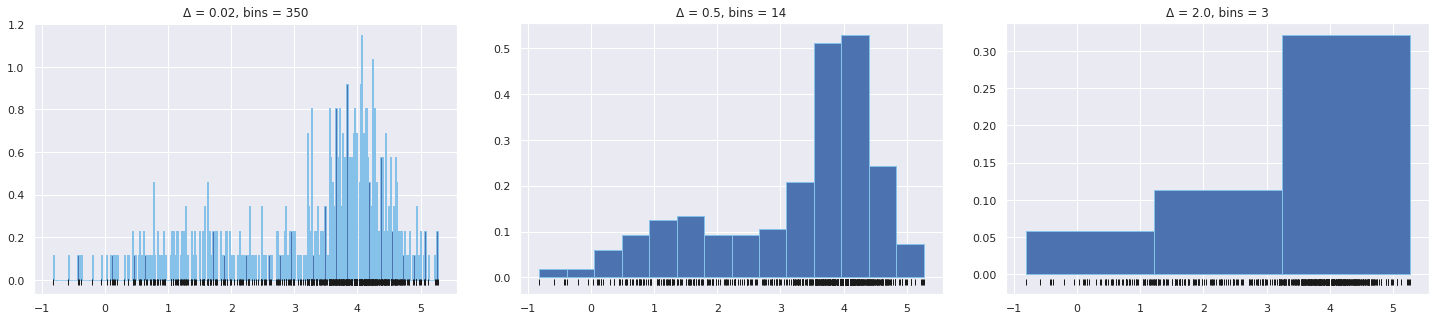

In [ ]:
x = train
bw = [0.02, 0.5, 2.0]

fig, ax = plt.subplots(1, 3, figsize=(25, 5))
fig.subplots_adjust(wspace=0.15)
for i in range(3):
    b = int(ceil(max_train - min_train) / bw[i])
    ax[i].hist(x, bins=b, density=True, edgecolor='#85C1E9')
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax[i].set_title(f'\u0394 = {bw[i]}, bins = {binc[i]}')


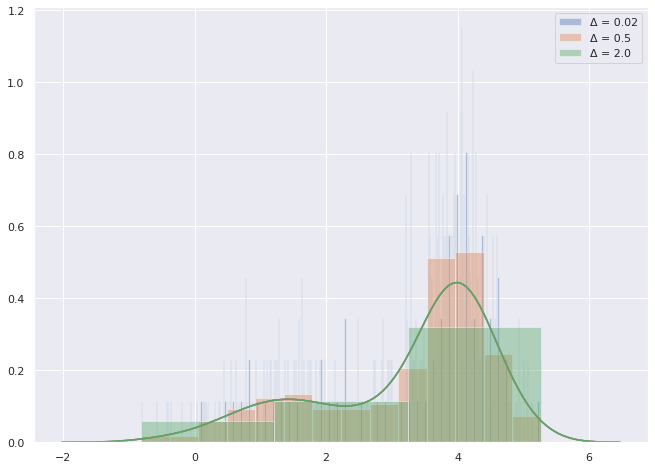

In [ ]:
for i in range(3):
  sns.distplot(train, bins=binc[i], label=f'\u0394 = {size[i]}')
plt.legend()

Log Likelihood for σ=0.03 is -411674.91228127305
Log Likelihood for σ=0.2 is -11036.703868952798
Log Likelihood for σ=0.8 is -2259.252130890276


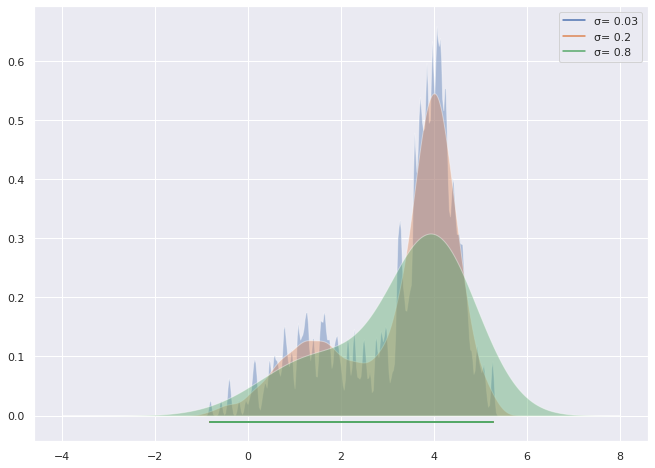

In [ ]:
# 3b with sklearn

bw = [0.03, 0.2, 0.8] # bandwidth
x = train
x_d = np.linspace(-4, 8, 500)

for i in range(3):
  # instantiate and fit the KDE model
  kde = KernelDensity(bandwidth=bw[i], kernel='gaussian')
  kde.fit(x[:, None])
  # score_samples returns the log of the probability density
  logprob = kde.score_samples(x_d[:, None])
  ll = np.sum(logprob)
  print(f'Log Likelihood for \u03C3={bw[i]} is {ll}')
  # Plotting
  plt.fill_between(x_d, np.exp(logprob), alpha=0.4)
  plt.plot(x, np.full_like(x, -0.01), label=f'\u03C3= {bw[i]}')

plt.legend()

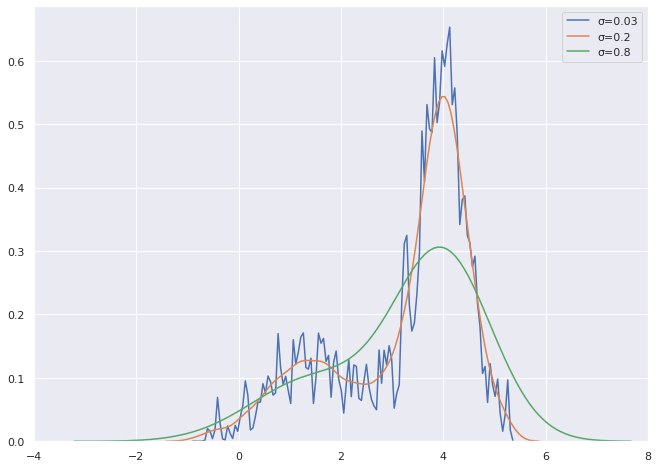

In [ ]:
bw = [0.03, 0.2, 0.8]
for i in range(3):
  sns.kdeplot(train, bw=bw[i], label=f'\u03C3={bw[i]}')
plt.xlim(-4,8)
plt.legend()

Log likelihood when σ=0.03 is -674.727938709064
Log likelihood when σ=0.2 is -717.0216577444179
Log likelihood when σ=0.8 is -795.6632833459042


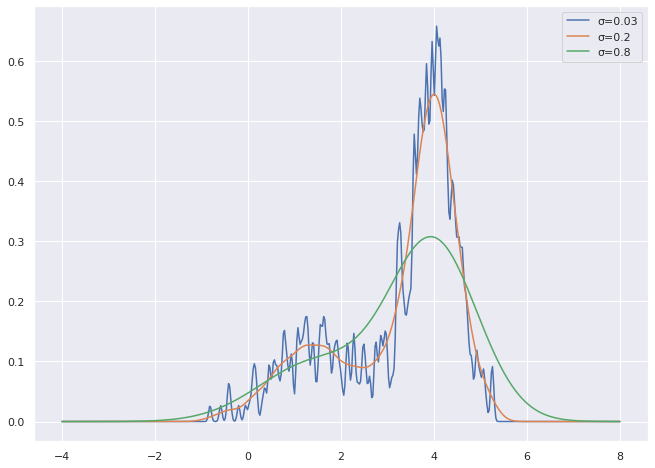

In [ ]:
# 3b

bw = [0.03, 0.2, 0.8] # bandwidth
x = train
xs = np.linspace(-4, 8, 500)

def get_KDE(x, h, data):
  sum = 0
  for sample in data:
    sum += np.exp(-(x - sample)**2/(2*h** 2))
  return sum / (sqrt(2*pi*h**2) * data.shape[0])

KDE_train_ll = []

for b in bw:
  ll = np.sum(np.log(get_KDE(train, b, train)))
  KDE_train_ll.append(ll)
  print(f'Log likelihood when \u03C3={b} is {ll}')
  plt.plot(xs, get_KDE(xs, b, train), label=f'\u03C3={b}')

plt.legend()

Log likelihood when K=2 is -58.81164004967166
Log likelihood when K=8 is -626.6603242817303
Log likelihood when K=35 is -694.6726503446198


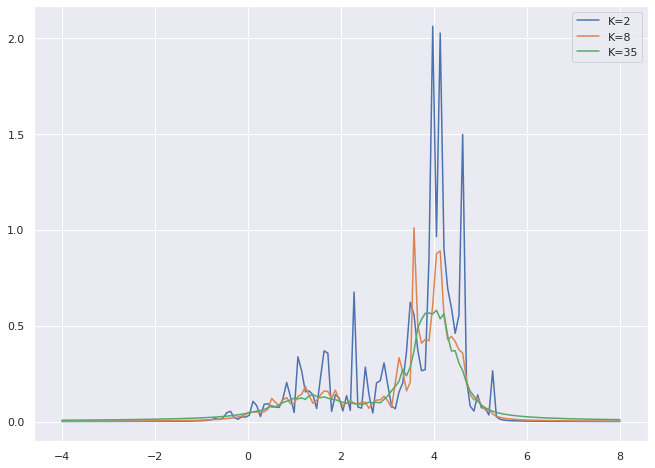

In [ ]:
# 3c K-Nearest Neighbors

xs = np.linspace(-4,8,150)
K = [2, 8, 35]

def KNN(x, k, data):
  tmp = np.sort(abs(data - x))
  return k / (data.shape[0] * tmp[k - 1] * 2)

def get_KNN_estimate(xs, k, data):
  y = []
  for i in xs:
    y.append(KNN(i, k, data))
  return y

KNN_train_ll = []

for k in K:
  ll = np.sum(np.log(get_KNN_estimate(train, k, train)))
  KNN_train_ll.append(ll)
  print(f'Log likelihood when K={k} is {ll}')
  plt.plot(xs, get_KNN_estimate(xs, k, train), label=f'K={k}')

plt.legend()
plt.show()

Log likelihood when σ=0.03 is -2812.1067563863708
Log likelihood when σ=0.2 is -2877.32622829489
Log likelihood when σ=0.8 is -3192.4847674164603


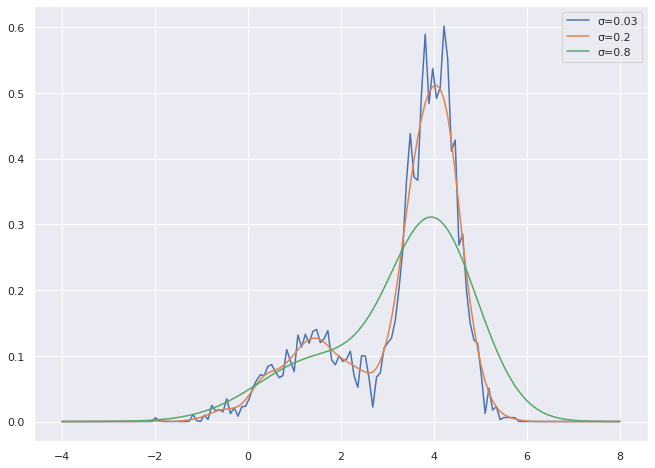

In [ ]:
# 3d 

# KDE on test set
KDE_test_ll = []

for b in bw:
  ll = np.sum(np.log(get_KDE(test, b, test)))
  KDE_test_ll.append(ll)
  print(f'Log likelihood when \u03C3={b} is {ll}')
  plt.plot(xs, get_KDE(xs, b, test), label=f'\u03C3={b}')

plt.legend()

Log likelihood when K=2 is -354.4916527863837
Log likelihood when K=8 is -2477.9346729652557
Log likelihood when K=35 is -2770.6536318228964


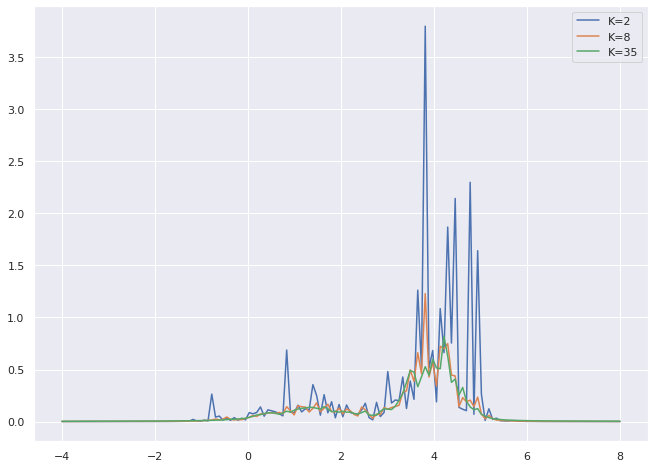

In [ ]:
# KNN on test set
KNN_test_ll = []

for k in K:
  ll = np.sum(np.log(get_KNN_estimate(test, k, test)))
  KNN_test_ll.append(ll)
  print(f'Log likelihood when K={k} is {ll}')
  plt.plot(xs, get_KNN_estimate(xs, k, test), label=f'K={k}')

plt.legend()

In [ ]:
x = PrettyTable()
x.field_names = ["Estimator", "Parameter", "Training", "Test"]

for i in range(3):
  x.add_row(["KDE", bw[i], KDE_train_ll[i], KDE_test_ll[i]])

x.add_row(["", "", "", ""])

for i in range(3):
  x.add_row(["KNN", K[i], KNN_train_ll[i], KNN_test_ll[i]])
  
print(x)

+-----------+-----------+--------------------+---------------------+
| Estimator | Parameter |      Training      |         Test        |
+-----------+-----------+--------------------+---------------------+
|    KDE    |    0.03   | -674.727938709064  | -2812.1067563863708 |
|    KDE    |    0.2    | -717.0216577444179 |  -2877.32622829489  |
|    KDE    |    0.8    | -795.6632833459042 | -3192.4847674164603 |
|           |           |                    |                     |
|    KNN    |     2     | -58.81164004967166 |  -354.4916527863837 |
|    KNN    |     8     | -626.6603242817303 | -2477.9346729652557 |
|    KNN    |     35    | -694.6726503446198 | -2770.6536318228964 |
+-----------+-----------+--------------------+---------------------+


## Task 4

In [ ]:
# 4a 
# a Gaussian Mixture Model with four 2- dimensional Gaussian distributions
data = np.loadtxt('sml-dataset/dataSets/gmm.txt')
data.shape

(500, 2)

In [ ]:
# initialize parameter
cluster = 4  # number of cluster
mu = np.array([[0,0],[2,0],[2,1],[4,2]])  # mean of each cluster
var =np.array([[1,1],[1,1],[1,1],[1,1]])  # variance of each cluster
prob = np.array([0.25,0.25,0.25,0.25])  # probability of each cluster
point = data.shape[0]  # number of point in dataset
w = np.ones((point,cluster)) / cluster  # probabilities of each sample belongs each cluster
prob.shape

(4,)

In [ ]:
# E step
def update_w(x,mu,var,prob):
    probability_dense = np.zeros((point,cluster))
    for i in range(cluster):
        probability_dense[:,i] = prob[i] * scipy.stats.multivariate_normal.pdf(x, mean=mu[i], cov=np.diag(var[i]))
    w = probability_dense/ probability_dense.sum(axis=1).reshape(-1,1)
    return w

def update_probability(w):
    prob = w.sum(axis = 0) / w.sum()
    return prob

In [ ]:
# M step
def update_mu(x,w):
    cluster = w.shape[1]
    mu = np.zeros((cluster,2))
    for i in range(cluster):
        mu[i] = np.average(x,axis=0,weights=w[:,i])
    return mu


def update_var(x,mu,w):
    cluster = w.shape[1]
    var = np.zeros((cluster,2))
    for i in range(cluster):
        var[i] = np.average((x-mu[i])**2, axis=0, weights=w[:,i])
    return var

In [ ]:
def log_likelihood(x,mu,var,prob):
    probability_dense = np.zeros((point,cluster))
    for i in range(cluster):
        probability_dense[:,i] = prob[i] * scipy.stats.multivariate_normal.pdf(x, mean=mu[i], cov=np.diag(var[i]))
    return np.mean(np.log(probability_dense.sum(axis=1)))

In [ ]:
def get_label(w):
    labels=np.zeros(w.shape[0])
    for i in range(w.shape[0]):
        labels[i] = w[i].tolist().index(max(w[i]))
    return labels

In [ ]:
plot_iteration=[1,3,5,10,30]
class_label=[]
gmm_ll = []
for i in range(31):
    w =update_w(data,mu,var,prob)
    prob = update_probability(w)
    mu = update_mu(data,w)
    var = update_var(data,mu,w)
    gmm_ll.append(log_likelihood(data,mu,var,prob))
    if i in plot_iteration:
        class_label.append(get_label(w))

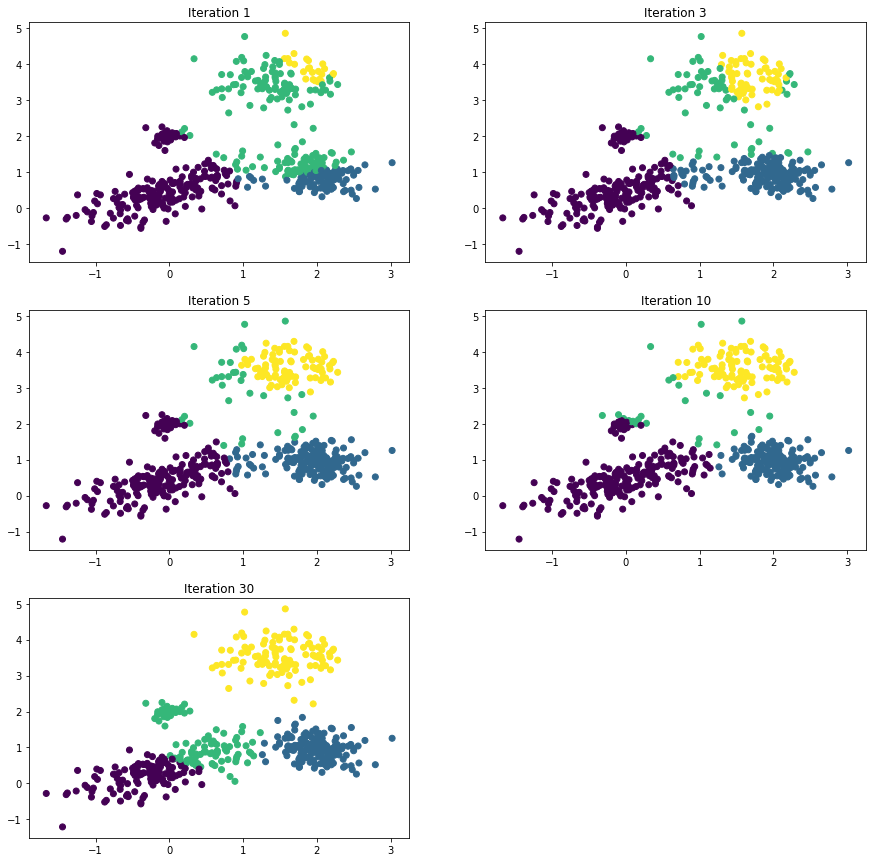

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.scatter(data[:,0],data[:,1], c=class_label[0])
plt.title('Iteration 1')

plt.subplot(3, 2, 2)
plt.scatter(data[:,0],data[:,1], c=class_label[1])
plt.title('Iteration 3')

plt.subplot(3, 2, 3)
plt.scatter(data[:,0],data[:,1], c=class_label[2])
plt.title('Iteration 5')

plt.subplot(3, 2, 4)
plt.scatter(data[:,0],data[:,1], c=class_label[3])
plt.title('Iteration 10')

plt.subplot(3, 2, 5)
plt.scatter(data[:,0],data[:,1], c=class_label[4])
plt.title('Iteration 30')

plt.savefig('4b.png')

Text(0.5, 1.0, 'Log Likelihood per Iteration')

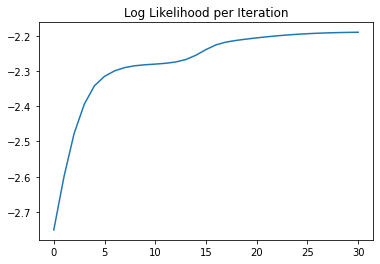

In [ ]:
plt.plot(range(31), gmm_ll)
plt.title('Log Likelihood per Iteration')

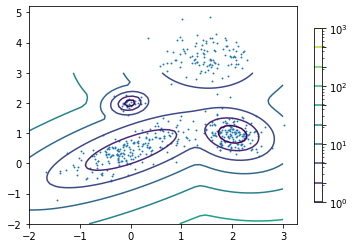

In [ ]:
# Using sklearn
from sklearn import mixture
from matplotlib.colors import LogNorm

clf = mixture.GaussianMixture(n_components=4, covariance_type='full', max_iter=30)
clf.fit(data)

x = np.linspace(-2., 3)
y = np.linspace(-2., 3)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(data[:, 0], data[:, 1], .8)
plt.show()
